# Q5

In [5]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

## part a

<h3> in this section we want to implement histogram equalization </h3>
<h3> you can use opencv library </h3>

In [6]:
image = cv2.imread('Q5_image/img_improvment.png',cv2.IMREAD_GRAYSCALE)
output_image = image.copy()
equalize_image = cv2.equalizeHist(output_image)

(-0.5, 383.5, 287.5, -0.5)

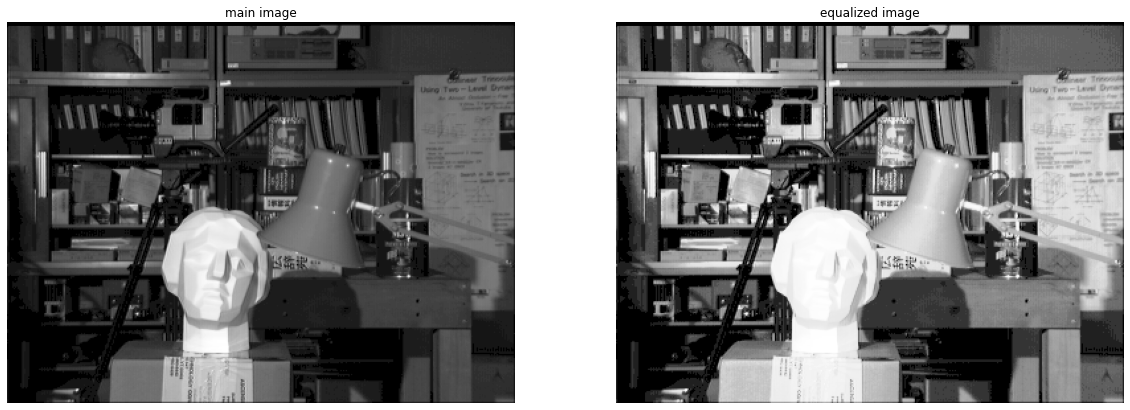

In [9]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalize_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part b

<h3> in this section we want to implement the first method for ACE </h3>
<h3> you can use opencv library </h3>
<h3> use 48(6*8) grids (size of the grids should be 48*48) </h3> 

In [17]:
def ACE1(image, gridSize):
  '''
  you can use the equalize function of OpenCV for each grid
  Use first method for ACE implementation (calculating transition function for each grid)
  input(s):
    image (ndarray): input image
    gridSize (int): window size for calculating histogram equalization
  output(s):
    output (ndarray): improved image
  '''
  x,y = image.shape
  output_image = image.copy()
# GRID  image (48 * 48)
  for i in range(0 , x , 48): 
    for j in range(0 , y, 48): 
      if i+ 48 <= x and j+48 <= y :
        grid_im = image[i:i+48, j:j+48]
        # equalizing each grid 
        eq_grid =  cv2.equalizeHist(grid_im)
        output_image[i:i+48, j:j+48] = eq_grid
      
  #######################
  #    your code here   #
  #######################
  
  return output_image

(-0.5, 383.5, 287.5, -0.5)

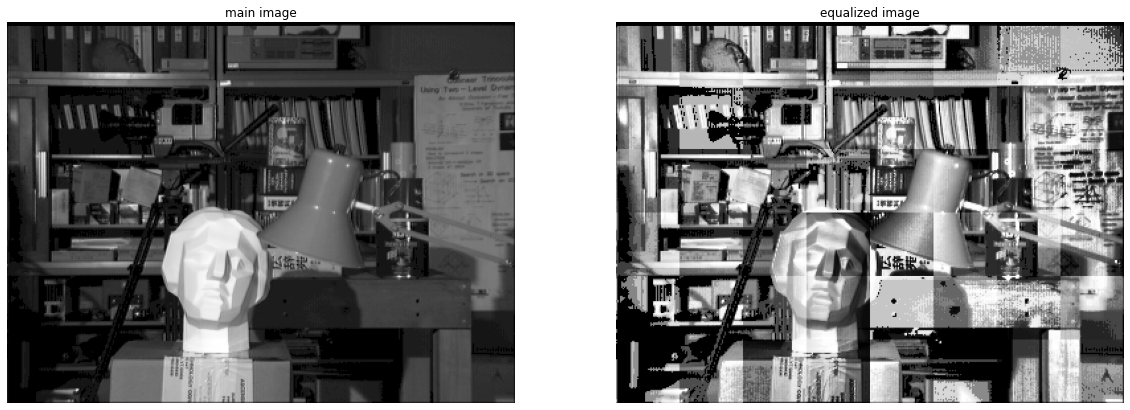

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE1(image,48)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part c

<h3> in this section we want to implement the second method for ACE </h3>
<h3> you can use opencv library </h3>

In [78]:
def ACE2(image, gridSize):
    '''
    you can just use the equalize function of OpenCV for each grid
    You can use OpenCV built-in tools for applying padding
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
    output(s):
      output (ndarray): improved image
    '''
    x,y = image.shape
    output_image = image.copy()
    g_a = gridSize[1]//2 
    g_b = gridSize[0] //2
    # bordering on picture for considering neighbor pixels for equalizing 
    output_image = cv2.copyMakeBorder(output_image, g_a, g_a, g_b, g_b, cv2.BORDER_REFLECT, None, value = 0)
    output = output_image.copy()
    for i in range(g_a , g_a + x): 
      for j in range(g_b , g_b + y): 
        grid= output[i-g_a:i+g_a , j - g_b: j+ g_b]

        output_image[i , j] = cv2.equalizeHist(grid)[g_a , g_b]
       

          
    
    #######################
    #    your code here   #
    #######################

    return output_image[g_a:x+g_a , g_b: y+g_b]

(-0.5, 383.5, 287.5, -0.5)

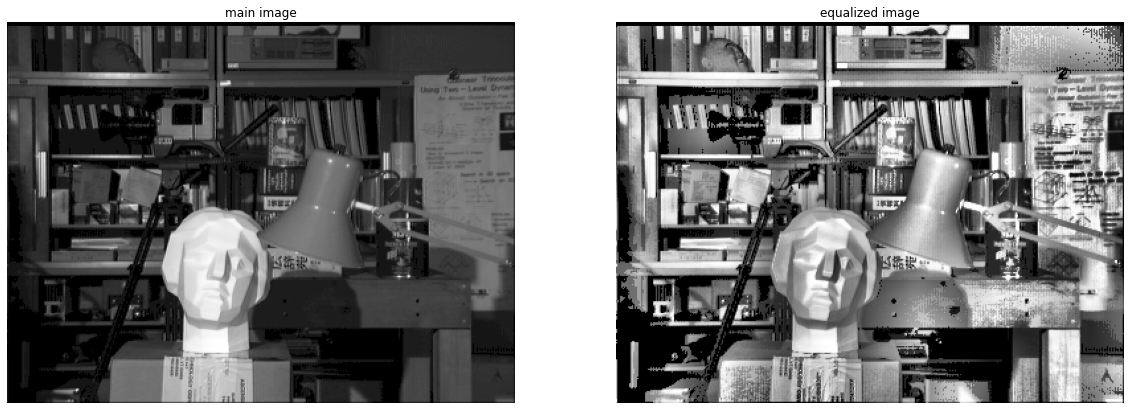

In [79]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = ACE2(image,(70,70))
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

## part d

<h3> in this section we want to implement CLAHE </h3>
<h3><b> note : you can just use opencv library for calculate histogram and applying padding </b></h3>
<h3><b>note : you can't use the equalize function of opencv</b></h3>

In [37]:
def histeq(image , limit): 
  hist,bins = np.histogram(image.ravel(),256,[0,256]) 
  #all the values wich are greater than limit
  histlimit = hist[hist>100]
  #calculate and spread it in the rest of the histogram
  val = int(histlimit.sum()/256)
  #values more than limit are considered as limit
  hist[hist>limit] = limit
  #sum up all the removed parts
  hist += val
  return hist

def equalizer(img , limit): 
    img2 = img.copy()
    hist  = histeq(img , limit)
    #calculate cdf
    cdf = hist.cumsum()
    cdf_normalized = np.round(255 * (cdf / cdf[-1]))
    img2 = cdf_normalized[img]
    return img2 


In [3]:






def CLAHE(image, gridSize, clip_limit):
    '''
    you can just use opencv library for calculate histogram and applying padding
    you can't use the equalize function of opencv
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
      image (ndarray): input image
      gridSize (tuple): window size for calculating histogram equalization
      clip_limit (int): threshold for contrast limiting
    output(s):
      output (ndarray): improved image
    '''
    output = image.copy()
    x,y = image.shape
    output_image = image.copy()
    g_a = gridSize[1]//2 
    g_b = gridSize[0] //2
    output_image = cv2.copyMakeBorder(output_image, g_a, g_a, g_b, g_b, cv2.BORDER_REFLECT, None, value = 0)
    output = output_image.copy()
    for i in range(g_a , g_a + x): 
      for j in range(g_b , g_b + y): 
        grid= output[i-g_a:i+g_a , j - g_b: j+ g_b]
        output_image[i , j] = equalizer(grid , clip_limit)[g_a , g_b]


    
    return output_image

In [4]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('main image')
plt.axis('off')

plt.subplot(1,2,2)
output_image = CLAHE(image,(70,70), 100)
plt.imshow(output_image, cmap='gray')
plt.title('equalized image')
plt.axis('off')

NameError: name 'plt' is not defined